# GA / Part 1

In [1]:
import numpy as np
import scipy 
import sklearn 
import matplotlib 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegressionCV

# Python Coding and Data Set

## Load in the data file and header file provided

In [2]:
df = pd.read_csv('breast-cancer.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
col_names = pd.read_csv('field_names.txt',header=None)
col_names

,0
0,ID
1,diagnosis
2,radius_mean
3,radius_sd_error
4,radius_worst
5,texture_mean
6,texture_sd_error
7,texture_worst
8,perimeter_mean
9,perimeter_sd_error


In [4]:
df.columns = col_names[0]
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

I need to make sure that in the "test" and "conversion" columns there are just 0 and 1 and the type is int. If there was Null, NA or any other number or character I need it to remove from dataset which is checked by type of the corresponding columns.  

In [6]:
np.where(pd.isnull(df)) # It shows the empty cells (NaN). In this case the gender column has all the NaN cells.

(array([], dtype=int64), array([], dtype=int64))

In [7]:
df["diagnosis"].value_counts() # The size of each class

B    357
M    212
Name: diagnosis, dtype: int64

## Compute the mean and median smoothness and compactness for benign and malignant tumors- do they differ? 

#### In this part I assume you want the mean and median of "mean of smoothnemss" and "mean of compactness" for different classes.

In [8]:
df.groupby(['diagnosis'])['compactness_mean'].mean()

diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64

In [9]:
df.groupby(['diagnosis'])['compactness_mean'].median()

diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64

In [10]:
df.groupby(['diagnosis'])['smoothness_mean'].mean()

diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64

In [11]:
df.groupby(['diagnosis'])['smoothness_mean'].median()

diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64

#### It looks smoothness_mean value give more information for two classes. As the value is bigger then it is more probable that the diagnose is malignant. But, we need to check it by proper statistical metric.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b72a750>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dd19710>], dtype=object)

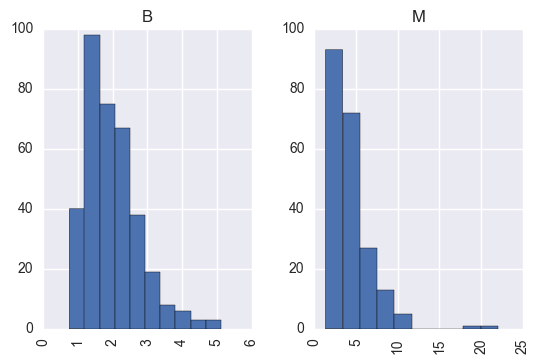

In [12]:
df['smoothness_mean'].hist(by=df['diagnosis'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ddaf4d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10df19f90>], dtype=object)

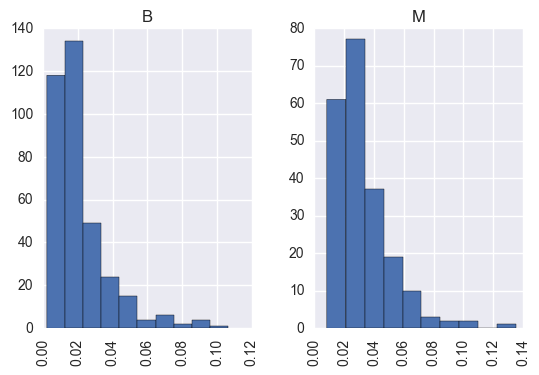

In [13]:
df['compactness_mean'].hist(by=df['diagnosis'])

In [14]:
df_C = df[['diagnosis','compactness_mean']]
df_S = df[['diagnosis','smoothness_mean']]

#### I applied t-test to see if the differences in the mean values are statistically significant. For both test (considering compactness and smoothness) the p-value is really small that it rejects null hypothesis.

In [15]:
data_C_M = np.array(df_C.groupby(['diagnosis']).get_group('M'))[:,1]
data_C_B = np.array(df_C.groupby(['diagnosis']).get_group('B'))[:,1]
stats.ttest_ind(data_C_M,data_C_B, equal_var = False)

Ttest_indResult(statistic=7.0826414764983108, pvalue=6.3418070772715821e-12)

In [16]:
data_S_M = np.array(df_S.groupby(['diagnosis']).get_group('M'))[:,1]
data_S_B = np.array(df_S.groupby(['diagnosis']).get_group('B'))[:,1]
stats.ttest_ind(data_S_M,data_S_B, equal_var = False)

Ttest_indResult(statistic=12.832762746967108, pvalue=6.8685528810869487e-29)

## Write a function to generate bootstrap samples of the data.

In [17]:
def my_bootstrap(data,sample_size):
    
    '''
    data: It is the dataframe of the population.
    sample_size: the size of the bootstapped sample. 
    
    Hint: randint gives random int values while it could be repetitive. This shows
    the "with replacement" characteristic of the bootsrap method.
    '''
    target_data = np.random.randint(low=0, high=data.shape[0], size=sample_size)
    return data.ix[target_data]  

my_bootstrap(df,5); # Example for a set of 5 sample

## Exploratory Analysis

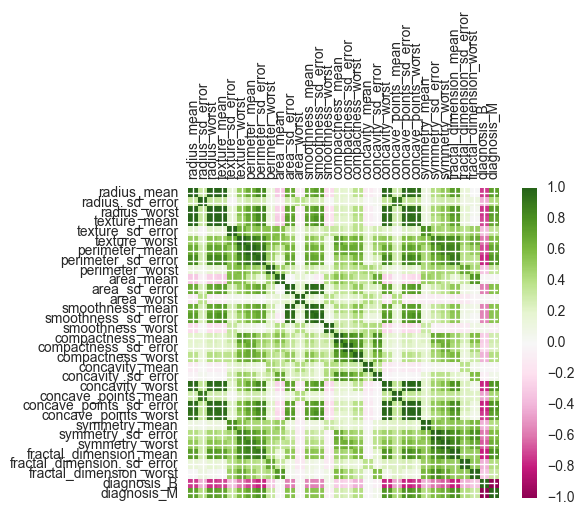

In [18]:
df_mod_1 = df.drop(df.columns[[0]], axis=1);
dfa = pd.get_dummies(df_mod_1) # As the diagnosis is a categorical data, I use dummy variables to binarize it.
corr = dfa.corr() # Compute the correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1, cmap=plt.cm.PiYG)
fig.colorbar(cax)
ticks = np.arange(0,32,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(dfa.columns.values)
ax.set_xticklabels(names,rotation='vertical')
ax.set_yticklabels(names)
plt.show()

#### In the following, I just consider the features that are highly correlated with the class type. It shows that by increasing the value of the following features (as in the corrlation plot) the cancer is malignant. It also shows, how the selected features are correlated to each other (the correlation value is above 0.8).

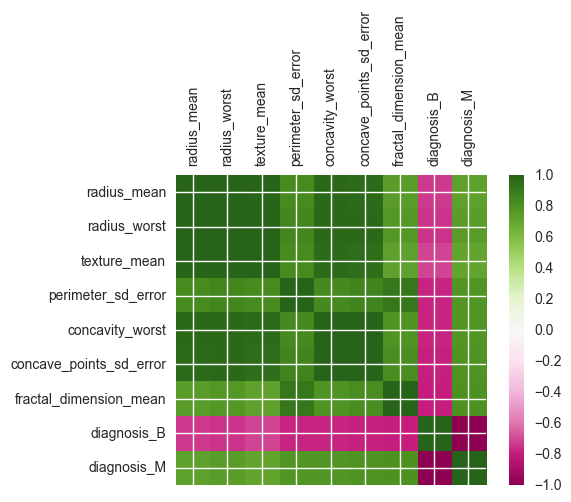

In [19]:
df_mod_2 = df.iloc[:,[1,2,4,5,9,22,24,29]];
dfb = pd.get_dummies(df_mod_2) 
corr = dfb.corr() # Compute the correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1, cmap=plt.cm.PiYG)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list(dfb.columns.values)
ax.set_xticklabels(names,rotation='vertical')
ax.set_yticklabels(names)
plt.show()

## Modeling (Compare two methods)

#### In the following, I will apply two ML methods: Random Forest and Logistic Regression

Random Forest has the following benefits:

1. Intuitive Decision Rules
2. Can handle non-linear features
3. Take into account variable interactions
4. Good with categorical features (altough our feature space doesn't have categorical type)

The only disadvantage of this method is that it doesn't have ranking score as direct result.

On the other hand, logistic regression has the following advantages,

1. Convenient probability scores for observations
2. Efficient implementations available across tools
3. Multi-collinearity is not really an issue (Can be solved by using L2 regularization)

But it has some disadvantages,

1. Doesn’t perform well when feature space is too large (In our case the feature set is not that large)
2. Doesn’t handle large number of categorical features/variables well (Not a case in this problem)
3. Relies on transformations for non-linear features

A question is asked regarding the overfitting problem. So, the random forest model would not overfit if you use more trees (4000 trees for our case). Also, I splitted the train and test sets (1/3 of the data just for test) so the model shows great accuracy.

One suggestion is to set the depth of tree as sqrt(number of features). But this gives less accurate results. 

In logistic regression, I standardized the training data set (so all features have 0 mean and standard deviation equal to 1). To stop ovefitting, I used "L2 regularization" term along with cross validation (check the command used).  

## Modeling (Random Forest)

#### There are almost twice as many benign tumors as cancerous, which means that the classes are unbalanced. Below I oversample the cancer class to get balanced classes, which improves accuracy a bit.

In [20]:
# Initialize random forest
forest = RandomForestClassifier(n_estimators = 4000, bootstrap = True, oob_score = True, n_jobs = 2)

In [21]:
# Get training and test sets
train, test = train_test_split(df, test_size = 0.33)

In [22]:
# get training and test features and dependent
num_features = len(df.columns) - 2
train_features = train.iloc[:, 2:]
train_y = train.iloc[:, 1]
test_features = test.iloc[:, 2:]
test_y = test.iloc[:, 1]

In [23]:
# since there are almost twice as many benign instances as cancer instances
# here I'm oversampling the cancer instances to make the classes even
ros = RandomOverSampler()
train_features_resampled, train_y_resampled = ros.fit_sample(train_features, train_y)

In [24]:
# fit the forest on the training data
forest1 = forest.fit(train_features_resampled, train_y_resampled)

In [25]:
# get OOB error
1 - forest1.oob_score_

0.016736401673640211

In [26]:
# use holdout set for testing (even though the OOB error should be unbiased) and get test error
forest1.score(test_features, test_y)

0.96808510638297873

#### .feature_importances_    gives the probability value for the importance of features based on the level, they make the majority of deceison trees to be splitted into pure groups.

In [27]:
# get feature importances
importance = forest1.feature_importances_

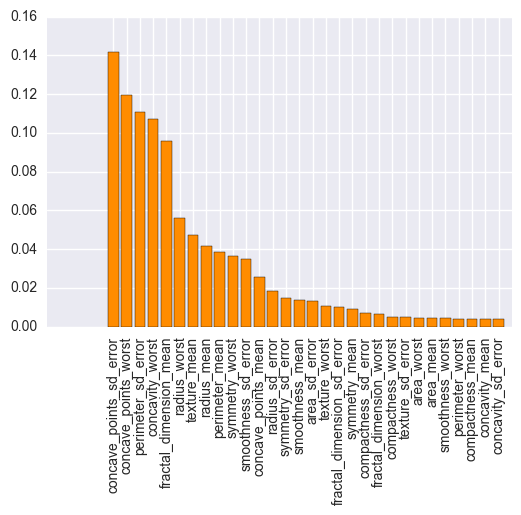

In [28]:
# plot feature importances
importance = pd.DataFrame(importance, index = train_features.columns, columns = ["Importance"])
importance = importance.sort_values('Importance', ascending = False)

x = range(importance.shape[0])
y = importance.ix[:, 0]

labels = importance.index
plt.bar(x, y, align = "center", color = "darkorange")
plt.xticks(rotation = 90)
plt.xticks(range(len(labels)), labels, size = "medium")
plt.show()

In [29]:
# get predicted classes
predicted_y = forest1.predict(test_features)

In [30]:
# get classification table

target_names = ['Benign', 'Malignant']
print(classification_report(test_y, predicted_y, target_names = target_names))

             precision    recall  f1-score   support

     Benign       0.98      0.97      0.97       118
  Malignant       0.94      0.97      0.96        70

avg / total       0.97      0.97      0.97       188



In [31]:
# Change the string labels into binary values to plot the ROC curves
lb = preprocessing.LabelBinarizer()
lb.fit(['B','M'])  
predicted_y_binary = lb.transform(predicted_y)
test_y_binary = lb.transform(test_y)

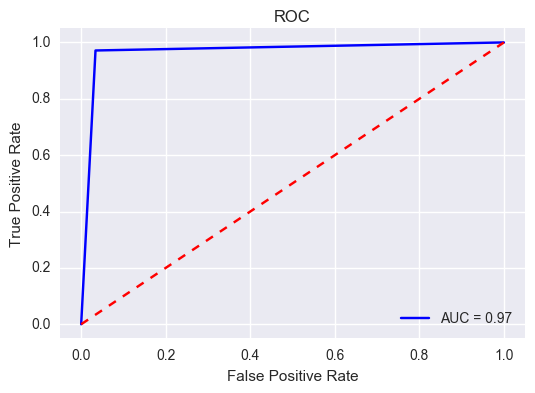

In [32]:
# get and plot roc curve and auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_binary, predicted_y_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'blue', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Modeling (Logistic Regression)

In [33]:
# Get training and test sets
train, test = train_test_split(df, test_size = 0.25)

In [34]:
# get training and test features and dependent
num_features = len(df.columns) - 2
train_features = train.iloc[:, 2:]
train_y = train.iloc[:, 1]
test_features = test.iloc[:, 2:]
test_y = test.iloc[:, 1]

In [35]:
# Standardization (mean removal and variance scaling)
scaler = preprocessing.StandardScaler().fit(train_features)
X_train_scaled = scaler.transform(train_features)

In [36]:
## Fit logistic regression model using the L2 pentalty

# Note that the liblinear function is okay for smaller sample sizes but can give problems for large samples 
# but it is a more exact solution

# Using a balanced class weight, i.e. biasing towards choosing 
#more malignant samples in the training data, seemed to work better. 

model_LR = lm.LogisticRegressionCV(penalty='l2', solver='liblinear', class_weight='balanced')
model_LR.fit(X_train_scaled, train_y)
clf = model_LR.coef_ # The beta coeficients of the fit model.
X_test_scaled = scaler.transform(test_features)
predicted_y = model_LR.predict(X_test_scaled)

In [37]:
# get classification table

target_names = ['Benign', 'Malignant']
print(classification_report(test_y, predicted_y, target_names = target_names))

             precision    recall  f1-score   support

     Benign       0.98      0.97      0.97        92
  Malignant       0.94      0.96      0.95        51

avg / total       0.97      0.97      0.97       143



In [38]:
# Change the string labels into binary values to plot the ROC curves
lb = preprocessing.LabelBinarizer()
lb.fit(['B','M'])  
predicted_y_binary = lb.transform(predicted_y)
test_y_binary = lb.transform(test_y)

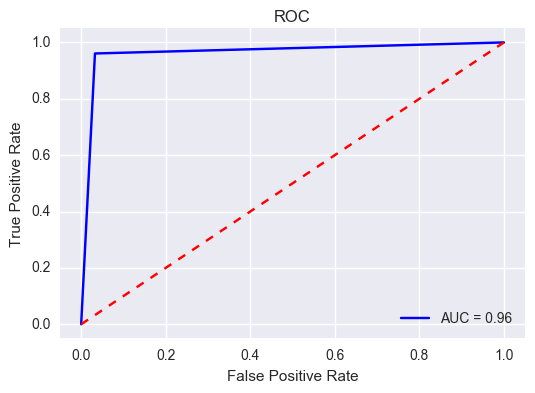

In [39]:
# get and plot roc curve and auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y_binary, predicted_y_binary)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'blue', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Identify the important features based on the absolute value of the coefficient. If it is higher, this means it has a highr impact on the model.

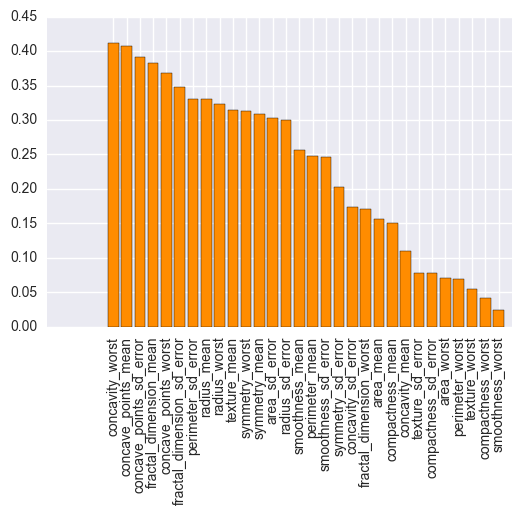

In [40]:
# plot feature importances
importance = pd.DataFrame(np.transpose(abs(clf)), index = train_features.columns, columns = ["Importance"])
importance = importance.sort_values('Importance', ascending = False)

x = range(importance.shape[0])
y = importance.ix[:, 0]

labels = importance.index
plt.bar(x, y, align = "center", color = "darkorange")
plt.xticks(rotation = 90)
plt.xticks(range(len(labels)), labels, size = "medium")
plt.show()

## Explanation (To Technical Audiences)

Regarding the next steps, I would eliminate the high correlated features and will re-do the RF. I believe it gives similar results. This helps to see the multi-linearity effects on the results.

Later, I would eliminate the labels and will run unsupervised learning ML methods (K-means clustering). That gives me the patterns of similar cases. Then I can validate the results in each cluster by observing the percentage of benign cases.

## Explanation (To Non-Technical Audiences)

In this challenge, we wanted to find a way to find the different tumors based on some characteristics we see from the images. Our approach was first, visulaize how different features are related to the type of tumor. This gives us an idea about hidden relations.

After that, we need to build a systematic way to predict the type of tumor based on our given information. It is obvious that we want this prediction to be as accurate as possible. In here, we designed models with about 96 percent accuracy. The two methods are Random Forest and Logistic Regression.

In Random Forest, we are dealing with thousands of trees. Each tree is a weak learner. For a data set, the tree is splitted in each node corresponding to an specific feature. The idea is which feature can give us two sets where one of them is just benign tumors data points and the other is just malignant ones. This will result a tree with branches and leafes. Then in random forest we use majority vote to find the most dominant features.

Logisitc regression, is a function of features and their corresponding weights. Having higher weight gives more importance on that feature. The goal, is to find the mentioned weights in a way that our predictions have high accuracy. 

# GA / Part 2

### Student Sample 1

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression  # Use this: from sklearn import linear_model
from sklearn.cross_validation import cross_val_score  # from sklearn.model_selection import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')   # The output will in data frame format. 
# So, it might be good to choose df as variable name


# Setup data for prediction
x1 = data.SalaryNormalized # data is not defined. Do you mean d ?
x2 = pd.get_dummies(data.ContractType) # On the model:  Having all features in categorical form, linear regression
# is not a good approach.  

# Don't use NON-DESCRIPTIVE VARIABLE NAMES. x2 is the feature space and x1 is the output ? x2 ---> X , x1 ----> y

# Setup model
model = LinearRegression()  # Edit this line to --->  linear_model.LinearRegression()

# Evaluate model  ---> Change this comment into deriving model
from sklearn.cross_validation import cross_val_score  # This is repeated.
from sklearn.cross_validation import train_test_split  # It is recommended to have all imports at 
# the begining of the code. So, the user will know the used classes.

# The correct class is : from sklearn.model_selection import train_test_split

# you mentioned the train, test split but you didn't apply it.
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') # To use "mean_absolute_error",
# you need to import metrics:   from sklearn import metrics

# The default value for cv in cross_val_score is 3. Having it as 1 , it means we are not applying cross-validation at all.

print(scores.mean()) # The output of the above command is the coefficients of the linear regression model. The .mean() 
# will not provide any information (average of all coefficients) 

# Evaluation approach: You need to test your model (on the test set) and see the prediction accuracy. 

### Student Sample 2

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # Use this: from sklearn import linear_model
from sklearn.cross_validation import cross_val_score # from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)  # The problem must be clear. It seems you want to estimate the normalized
# salary based on the contract type. Can't you switch the features and output? Dummy variables look like one feature
# in each row, as except one the rest of the columns has 0 value. You might change this problem 
# into classification problem.

# In general, having just one feature and trying to estimate the target with it, is not a good idea. 
# I assume here you mostly want to find any specific patterns between each two columns (in main data set).

# Setup model
model = LinearRegression() # Edit this line to --->  linear_model.LinearRegression()

# Evaluate model   ---> Change this comment into deriving model

# Before running model, need to split the train and test cases.
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error') # To use "mean_absolute_error",
# you need to import metrics:   from sklearn import metrics
print(scores.mean())# The output of the above command is the coefficients of the linear regression model. The .mean() 
# will not provide any information (average of all coefficients) 

# Evaluation approach: You need to test your model (on the test set) and see the prediction accuracy. 


# Hint: It is good to visulaize the relations between different features before jump into the model design.

# Hint: In case of using cv = 5, it is good to explore higher values of cv and study its 
# effect on the prediction values.